**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.X_train)
    
    def predict(self, X):
        predictions = np.zeros((X.shape[0]))
        if self.algorithm == 'brute':
            for j, row in enumerate(X):
                dist = ((self.X_train - row)**2).sum(axis=1)
                best_indices = np.argsort(dist)[:self.n_neighbors]
                best_predicts = self.y_train[best_indices]
                predictions[j] = np.argmax(np.bincount(best_predicts))
        elif self.algorithm == 'kd_tree':
            _, best_indices = self.tree.query(X, k=self.n_neighbors)
            best_predicts = self.y_train[best_indices]
            predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=best_predicts)
        return predictions


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%timeit clf.fit(X_train, y_train)

297 µs ± 36.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit my_clf.fit(X_train, y_train)

353 ns ± 12.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
%timeit clf.predict(X_test)

1.65 ms ± 80 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%timeit my_clf.predict(X_test)

624 µs ± 8.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%timeit clf.fit(X_train, y_train)

654 µs ± 41.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit my_clf.fit(X_train, y_train)

264 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%timeit clf.predict(X_test)

1.81 ms ± 59.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%timeit my_clf.predict(X_test)

440 µs ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50)
X = vectorizer.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True, random_state=42)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [23]:
def optimal_k(X, y, size=10, metric='euclidean'):
    val_scores = []
    for k in range(1, size + 1):
        clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        acc_scores = []
        for train, test in kf.split(X):
            X_train, X_test = X[train], X[test]
            y_train, y_test = target[train], target[test]
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc_scores.append(accuracy_score(y_test, y_pred))
        val_scores.append(np.mean(acc_scores))
        print(f"k = {k}, score = {val_scores[-1]}")
    best_k, best_score = np.argmax(val_scores) + 1, np.max(val_scores)
    
    plt.figure(figsize=(11, 6))
    plt.plot(range(1, size + 1), val_scores)
    plt.plot(best_k, best_score, 'ro')
    plt.title(f"best_k = {best_k}, best_score = {np.round(best_score, 4)}, metric = {metric}")
    plt.xlabel('k')
    plt.ylabel('score')
    
    return best_k, best_score

k = 1, score = 0.1252433058037474
k = 2, score = 0.11693446826204972
k = 3, score = 0.11720009516168628
k = 4, score = 0.12276848798372803
k = 5, score = 0.12382916771300466
k = 6, score = 0.12656912031401105
k = 7, score = 0.13010471160019269
k = 8, score = 0.1279828600229899
k = 9, score = 0.13107669280144774
k = 10, score = 0.1308999987720468
k = 11, score = 0.1304577950141163
k = 12, score = 0.13178358609015858
k = 13, score = 0.1327557781994063
k = 14, score = 0.13098815831297603
k = 15, score = 0.13240189802195487
k = 16, score = 0.13275549698874942
k = 17, score = 0.13293261283413568
k = 18, score = 0.13602614096771523
k = 19, score = 0.13593777051879333
k = 20, score = 0.1371750974090281
k = 21, score = 0.13797066579153913
k = 22, score = 0.13894309224300086
k = 23, score = 0.14088766393526755
k = 24, score = 0.14115298619002584
k = 25, score = 0.14124138007316914
k = 26, score = 0.14221371278774528
k = 27, score = 0.14141819127367714
k = 28, score = 0.14265533069014064
k = 29,

(30, 0.1440695156493262)

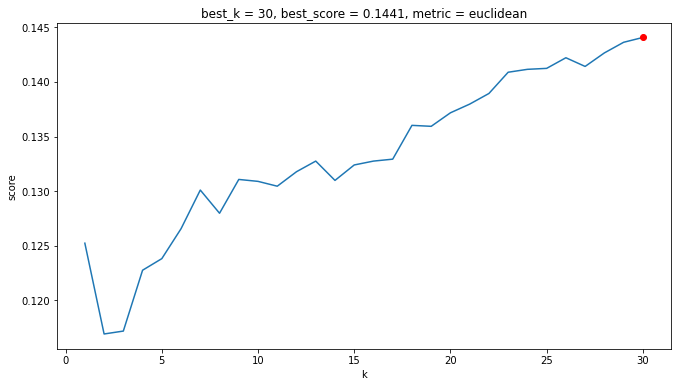

In [24]:
%%time
best_k, best_score = optimal_k(X, target, size=30)
best_k, best_score

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

k = 1, score = 0.14813514215526782
k = 2, score = 0.1393850147902745
k = 3, score = 0.1417715324640362
k = 4, score = 0.14132975052209104
k = 5, score = 0.14548360687162612
k = 6, score = 0.1454838646480616
k = 7, score = 0.14707467333398386
k = 8, score = 0.14946112070508136
k = 9, score = 0.15343872827542224
k = 10, score = 0.1541457856036829
k = 11, score = 0.15662097837124475
k = 12, score = 0.1552947654792172
k = 13, score = 0.15485288980038636
k = 14, score = 0.15564852848556157
k = 15, score = 0.15538339370457452
k = 16, score = 0.15609068537504925
k = 17, score = 0.15697429612738242
k = 18, score = 0.15538344057301734
k = 19, score = 0.15502972443511576
k = 20, score = 0.15405750889164663
k = 21, score = 0.1530853167823989
k = 22, score = 0.15317387470509206
k = 23, score = 0.154411271897991
k = 24, score = 0.1545877315851779
k = 25, score = 0.15202444957935105
k = 26, score = 0.15326165929847876
k = 27, score = 0.15140545805513397
k = 28, score = 0.1511405810505824
k = 29, sco

(17, 0.15697429612738242)

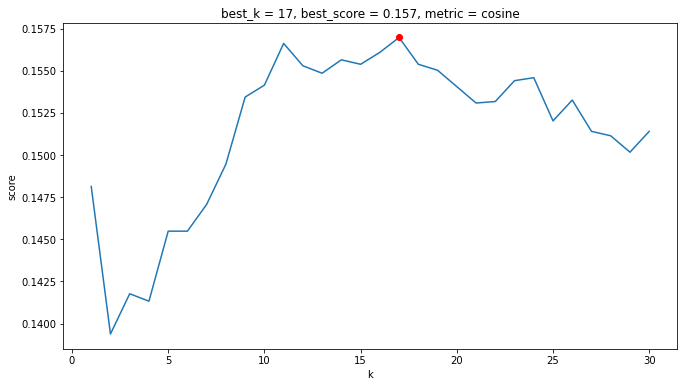

In [25]:
%%time
best_k, best_score = optimal_k(X, target, size=30, metric='cosine')
best_k, best_score

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=50)
X = vectorizer.fit_transform(data).toarray()

k = 1, score = 0.15458716916386417
k = 2, score = 0.14424606907339874
k = 3, score = 0.14707425151799855
k = 4, score = 0.14557221166276205
k = 5, score = 0.1471631609540128
k = 6, score = 0.15246648929773168
k = 7, score = 0.15414538722191898
k = 8, score = 0.1565319048956807
k = 9, score = 0.15609005265107131
k = 10, score = 0.1582997122558822
k = 11, score = 0.15626695758846487
k = 12, score = 0.15847642971950457
k = 13, score = 0.15918369795575785
k = 14, score = 0.15989080215246135
k = 15, score = 0.15971387378084634
k = 16, score = 0.15989075528401855
k = 17, score = 0.15891889125387051
k = 18, score = 0.1567091847806168
k = 19, score = 0.1575928658356142
k = 20, score = 0.15750409700492843
k = 21, score = 0.15900683988680708
k = 22, score = 0.15838805927058267
k = 23, score = 0.16006735557653387
k = 24, score = 0.16059769544117217
k = 25, score = 0.16218843382443027
k = 26, score = 0.162365174722274
k = 27, score = 0.16121638232051097
k = 28, score = 0.16006758991874792
k = 29, 

(26, 0.162365174722274)

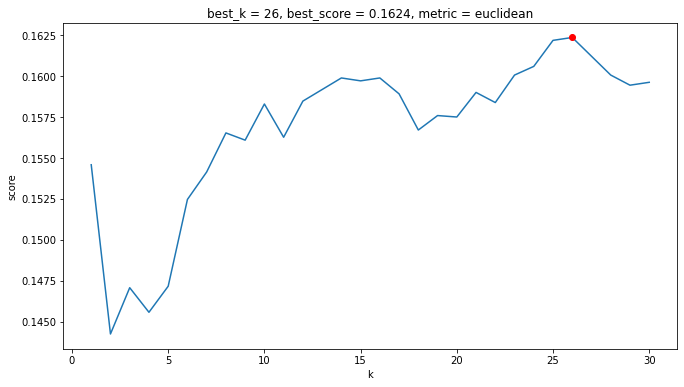

In [27]:
%%time
best_k, best_score = optimal_k(X, target, size=30)
best_k, best_score

k = 1, score = 0.1556478488931408
k = 2, score = 0.14512996103638873
k = 3, score = 0.14698581076641246
k = 4, score = 0.14574909316593423
k = 5, score = 0.14804709978544564
k = 6, score = 0.15273164751294013
k = 7, score = 0.15449893932027073
k = 8, score = 0.15688543355981102
k = 9, score = 0.15653195176412352
k = 10, score = 0.15829966538743936
k = 11, score = 0.1566204862525952
k = 12, score = 0.15874156450049162
k = 13, score = 0.15944880930252353
k = 14, score = 0.1600675430503051
k = 15, score = 0.1606861361927583
k = 16, score = 0.16015589006500558
k = 17, score = 0.15847685153548988
k = 18, score = 0.15617875117909286
k = 19, score = 0.15706243223409025
k = 20, score = 0.15653181115879508
k = 21, score = 0.1578578365770514
k = 22, score = 0.15829961851899657
k = 23, score = 0.15997891482494778
k = 24, score = 0.16050923125536468
k = 25, score = 0.16201159918970084
k = 26, score = 0.1623651278538312
k = 27, score = 0.16112794156892488
k = 28, score = 0.15971396751773198
k = 29,

(26, 0.1623651278538312)

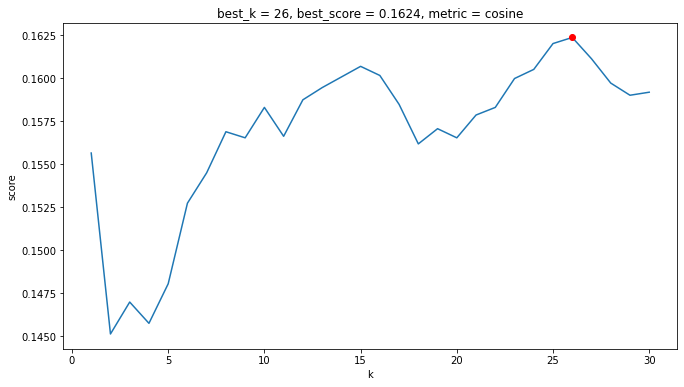

In [28]:
%%time
best_k, best_score = optimal_k(X, target, size=30, metric='cosine')
best_k, best_score

Лучшая модель - с косинусной метрикой и TfidfVectorizer при k=26. Качество на валидации незначительно, но лучше.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [29]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [30]:
data_test = newsgroups['data']
target_test = newsgroups['target']

In [31]:
vectorizer = TfidfVectorizer(max_features=50)
X_test = vectorizer.fit_transform(data_test).toarray()

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [32]:
clf = KNeighborsClassifier(n_neighbors=26, metric='cosine')
clf.fit(X, target)

KNeighborsClassifier(metric='cosine', n_neighbors=26)

In [33]:
y_pred = clf.predict(X_test)
accuracy_score(target_test, y_pred)

0.08789166224110462

**Вывод:** Точность на тестовой выборке в 2 раза меньше. Это может быть связано с тем, что в тестовой выборке есть наборы слов, которых нет в тренировочной, т.е. тренировочная слабо описывает тестовую. Также в этой задаче достаточно большое пространство признаков, которые при этом разрежены, поэтому KNN слабо справляется с ее решением.